# **Toss Decision Prediction**
---

## **Importing libraries and setting up the data repository :**

In [28]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('../csv_files/matches.csv')
pd.set_option('display.max_columns', None)

## **Exploratory Data Analysis (EDA)**

This dataset has 32 rows which shows the data of 32 ODIs

In [30]:
df.shape

(32, 18)

In [31]:
df.head(8)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,NaN,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,NaN,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,NaN,6.0,Group


In [32]:
df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           32 non-null     object 
 1   team1            32 non-null     object 
 2   team2            32 non-null     object 
 3   date             32 non-null     object 
 4   match_number     32 non-null     int64  
 5   venue            32 non-null     object 
 6   city             32 non-null     object 
 7   toss_winner      32 non-null     object 
 8   toss_decision    32 non-null     object 
 9   player_of_match  32 non-null     object 
 10  umpire1          32 non-null     object 
 11  umpire2          32 non-null     object 
 12  reserve_umpire   31 non-null     object 
 13  match_referee    32 non-null     object 
 14  winner           32 non-null     object 
 15  winner_runs      16 non-null     float64
 16  winner_wickets   16 non-null     float64
 17  match_type       3

In [34]:
df.describe()

,match_number,winner_runs,winner_wickets
count,32.000000,16.000000,16.000000
mean,16.500000,121.250000,6.375000
std,9.380832,74.981331,1.962142
min,1.000000,5.000000,1.000000
25%,8.750000,78.000000,5.750000
50%,16.500000,101.000000,7.000000
75%,24.250000,149.000000,8.000000
max,32.000000,309.000000,9.000000


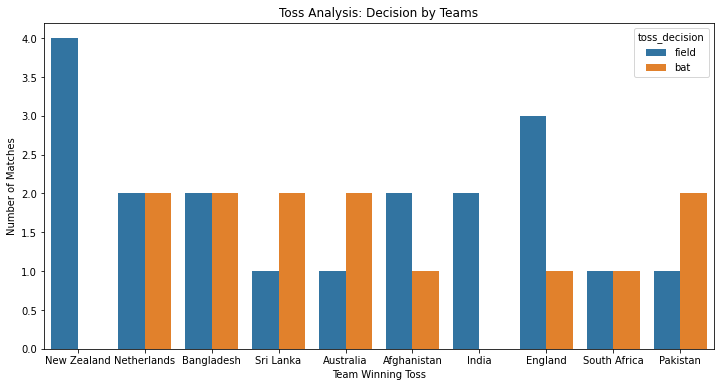

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_winner', hue='toss_decision', data=df)
plt.title('Toss Analysis: Decision by Teams')
plt.xlabel('Team Winning Toss')
plt.ylabel('Number of Matches')
plt.show()

This graph indicates which teams tend to choose batting or bowling after winning the toss in cricket matches. It provides view of teams' preferences when given the opportunity to decide.

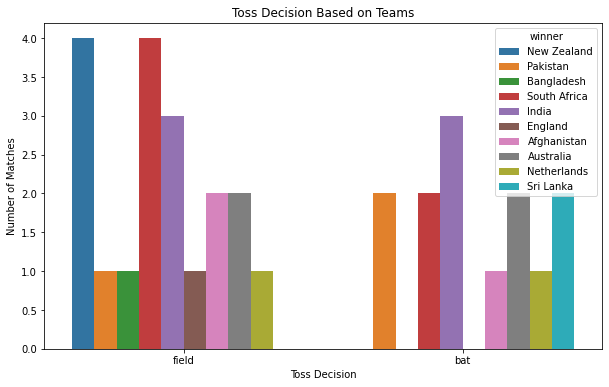

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', hue='winner', data=df)
plt.title('Toss Decision Based on Teams')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

This plot shows the of teams' toss decision in various matches.

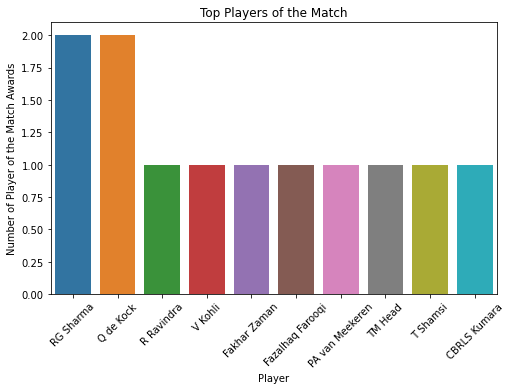

In [37]:
top_players = df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match Awards')
plt.xticks(rotation=45)
plt.show()

This plot shows how many times a player has recieved the 'Player of the match' award.

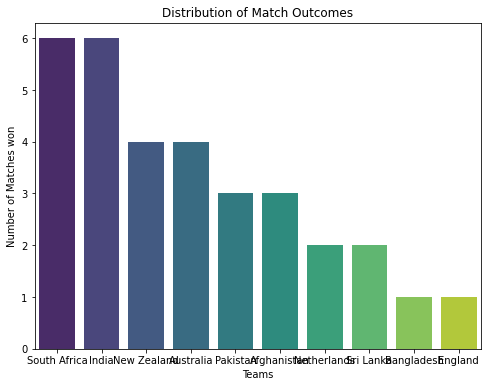

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='winner', data=df, order=df['winner'].value_counts().index, palette='viridis')
plt.title('Distribution of Match Outcomes')
plt.ylabel('Number of Matches won')
plt.xlabel('Teams')
plt.show()

This figure depicts the distribution of match outcomes, which displays the number of matches won by each team.

Now, we drop the unnecessary columns which are not important for toss decision prediction task.

In [39]:
df.drop(['season','date', 'match_number','player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type','city'],axis='columns',inplace=True)

df.shape

(32, 5)

In [40]:
df.head()

,team1,team2,venue,toss_winner,toss_decision
0,England,New Zealand,Narendra Modi Stadium,New Zealand,field
1,Pakistan,Netherlands,Rajiv Gandhi International Stadium,Netherlands,field
2,Afghanistan,Bangladesh,Himachal Pradesh Cricket Association Stadium,Bangladesh,field
3,South Africa,Sri Lanka,Arun Jaitley Stadium,Sri Lanka,field
4,Australia,India,MA Chidambaram Stadium,Australia,bat


In [41]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

team1: ['England' 'Pakistan' 'Afghanistan' 'South Africa' 'Australia'
 'New Zealand' 'Sri Lanka' 'Bangladesh' 'Netherlands' 'India']
team2: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'India' 'Pakistan'
 'Australia' 'England' 'South Africa' 'Afghanistan']
venue: ['Narendra Modi Stadium' 'Rajiv Gandhi International Stadium'
 'Himachal Pradesh Cricket Association Stadium' 'Arun Jaitley Stadium'
 'MA Chidambaram Stadium'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium'
 'Maharashtra Cricket Association Stadium' 'M Chinnaswamy Stadium'
 'Wankhede Stadium' 'Eden Gardens']
toss_winner: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'Australia'
 'Afghanistan' 'India' 'England' 'South Africa' 'Pakistan']
toss_decision: ['field' 'bat']


# **Label Encoding :**

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()
toss_mapping = {}

for column in df.columns:
    df[column] = le.fit_transform(df[column])
    toss_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

toss_mapping

{'team1': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'team2': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'venue': {'Arun Jaitley Stadium': 0,
  'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 1,
  'Eden Gardens': 2,
  'Himachal Pradesh Cricket Association Stadium': 3,
  'M Chinnaswamy Stadium': 4,
  'MA Chidambaram Stadium': 5,
  'Maharashtra Cricket Association Stadium': 6,
  'Narendra Modi Stadium': 7,
  'Rajiv Gandhi International Stadium': 8,
  'Wankhede Stadium': 9},
 'toss_winner': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'toss_decision': {'bat': 

### **Model Tarining and Testing :**

In [44]:
X=df.drop('toss_decision',axis='columns')
y=df['toss_decision']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle=True)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [47]:
ensembled_classifier=RandomForestClassifier(random_state=42)

In [48]:
ensembled_classifier.fit(X_train,y_train)
y_pred=ensembled_classifier.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.5

(Random Forest Classifier) Accuracy : 0.5

In [49]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.8

(Support Vector Machine) Accuracy : 0.8

In [50]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.4

(Logistic Regression) Accuracy : 0.4

In [51]:
svc=SVC()
svc.fit(X,y)
y_pred=svc.predict(X)
acc=accuracy_score(y_pred,y)
acc

0.90625

(Support Vector Machine) Accuracy : 0.90625

In [52]:
import pickle
pickle_out = open("../pickle_files/toss_decision.pkl","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()